# Machine Learning Projects Portofolio
### Ketentuan Tugas :
1. Download File Template code disini : https://drive.google.com/drive/folders/1a-JwQ6Cj4xu_0keDLHtLD4o64_feXxzj?usp=sharing 
2. Dibebaskan untuk men-download Dataset dari Kaggle, pilih untuk kasus supervised atau unsupervised.
3. Buatlah End to end project Machine Learning di local jupyter notebook / Google Collaboratory.
4. Ganti nama file : template_pr_day10.ipynb  dengan PR_day10_nama_siswa.ipynb
5. Upload Dataset yang digunakan ke Kaggle dan pilih mode private.
6. Pilih Create New Notebook (tulis insight yang ada didalam code projek dalam markdown) dan upload projek machine learning file jupyter notebook ke Kaggle
7. Upload file code dan ppt (jika ada) ke dalam github repository + file readme.
8. Tugas ini bersifat individu, dikumpulkan ke tim Dibimbing.id

In [1]:
#Import libraries and dataset
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
for c in bankloan.columns:
    display(bankloan[c].value_counts())

ID
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: count, Length: 5000, dtype: int64

Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: count, dtype: int64

Income
44     85
38     84
81     83
41     82
39     81
       ..
202     2
203     2
189     2
224     1
218     1
Name: count, Length: 162, dtype: int64

ZIP.Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: count, Length: 467, dtype: int64

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

CCAvg
0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
3.25      1
3.67      1
4.67      1
8.90      1
2.75      1
Name: count, Length: 108, dtype: int64

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

Mortgage
0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: count, Length: 347, dtype: int64

Personal.Loan
0    4520
1     480
Name: count, dtype: int64

Securities.Account
0    4478
1     522
Name: count, dtype: int64

CD.Account
0    4698
1     302
Name: count, dtype: int64

Online
1    2984
0    2016
Name: count, dtype: int64

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [4]:
bankloan.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Data yang didapat dari <i>Kaggle</i> sudah dilakukan feature engineering sehingga bisa langsung dimasukkan ke dalam model machine learning.

In [5]:
bank_train, bank_test = train_test_split(bankloan, test_size=0.2)

x_train = bank_train.drop(columns=['Personal.Loan'])
x_test = bank_test.drop(columns=['Personal.Loan'])

y_train = bank_train['Personal.Loan']
y_test = bank_test['Personal.Loan']


Split data menjadi data train & test

In [6]:
dt_model = DecisionTreeClassifier()

dt_model.fit(x_train, y_train)
y_train_dt_pred = dt_model.predict_proba(x_train)[:, 1]
y_test_dt_pred = dt_model.predict_proba(x_test)[:, 1]

roc_auc_train_dt = roc_auc_score(y_train, y_train_dt_pred)
roc_auc_test_dt = roc_auc_score(y_test, y_test_dt_pred)

print("Decision Tree ROC AUC on training set:", roc_auc_train_dt)
print("Decision Tree ROC AUC on testing set:", roc_auc_test_dt)

Decision Tree ROC AUC on training set: 1.0
Decision Tree ROC AUC on testing set: 0.9627560521415269


Model Klasifikasi dengan Decision Tree menunjukan ada indikasi <b>overfit</b>

In [7]:
# Define parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 5, 10]
}

# Set up grid search for Decision Tree
search_dt = GridSearchCV(dt_model, param_grid_dt, scoring='roc_auc', cv=5, refit=True)

# Perform hyperparameter tuning
search_dt.fit(x_train, y_train)

best_params = search_dt.best_params_
dt_grid_best = DecisionTreeClassifier(**best_params)
dt_grid_best.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [8]:
y_train_dt_prob = dt_grid_best.predict_proba(x_train)[:, 1]
y_test_dt_prob = dt_grid_best.predict_proba(x_test)[:, 1]

# Calculate ROC AUC scores for training and testing data
roc_auc_train_dt = roc_auc_score(y_train, y_train_dt_prob)
roc_auc_test_dt = roc_auc_score(y_test, y_test_dt_prob)

print("Decision Tree ROC AUC on training set:", roc_auc_train_dt)
print("Decision Tree ROC AUC on testing set:", roc_auc_test_dt)

Decision Tree ROC AUC on training set: 0.9930276781609195
Decision Tree ROC AUC on testing set: 0.9959404096834265


Setelah dilakukan hyperparameter tuning dengan menggunakan <b>Grid Search</b>, nilai <i>ROC AUC</i> menunjukan adanya kemungkinan bahwa performa model sudah <b>optimal</b>.

In [9]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 5, 10]
}

# Inisialisasi objek RandomizedSearchCV
rf_random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='roc_auc')

# Lakukan pencarian parameter terbaik
rf_random_search.fit(x_train, y_train)

rf_best_params = rf_random_search.best_params_

# Buat model terbaik dengan parameter terbaik
dt_best_random = DecisionTreeClassifier(**rf_best_params)

# Latih model terbaik pada data pelatihan
dt_best_random.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [10]:
y_train_dt_pred = dt_best_random.predict_proba(x_train)[:, 1]
y_test_dt_pred = dt_best_random.predict_proba(x_test)[:, 1]

# Calculate ROC AUC scores for training and testing data
roc_auc_train_dt = roc_auc_score(y_train, y_train_dt_pred)
roc_auc_test_dt = roc_auc_score(y_test, y_test_dt_pred)

print("Decision Tree ROC AUC on training set:", roc_auc_train_dt)
print("Decision Tree ROC AUC on testing set:", roc_auc_test_dt)

Decision Tree ROC AUC on training set: 0.9930276781609195
Decision Tree ROC AUC on testing set: 0.9959404096834265


Setelah dilakukan hyperparameter tuning dengan menggunakan <b>Random Search</b>, nilai <i>ROC AUC</i> menunjukan adanya kemungkinan bahwa performa model sudah <b>optimal</b>.

In [11]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)
y_train_logistic_prob = logistic_model.predict_proba(x_train)[:, 1]
y_test_logistic_prob = logistic_model.predict_proba(x_test)[:, 1]

roc_auc_train_logistic = roc_auc_score(y_train, y_train_logistic_prob)
roc_auc_test_logistic = roc_auc_score(y_test, y_test_logistic_prob)

print("Logistic Regression ROC AUC on training set:", roc_auc_train_logistic)
print("Logistic Regression ROC AUC on testing set:", roc_auc_test_logistic)

Logistic Regression ROC AUC on training set: 0.9218493793103447
Logistic Regression ROC AUC on testing set: 0.9193083266826283


Model Klasifikasi dengan Linear Regression menunjukan bahwa performa model <b>sudah baik</b> namun ada kemungkinan untuk bisa ditingkatkan lagi.

In [12]:
def plot_learning_curve(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()

### Plot Learning Curve

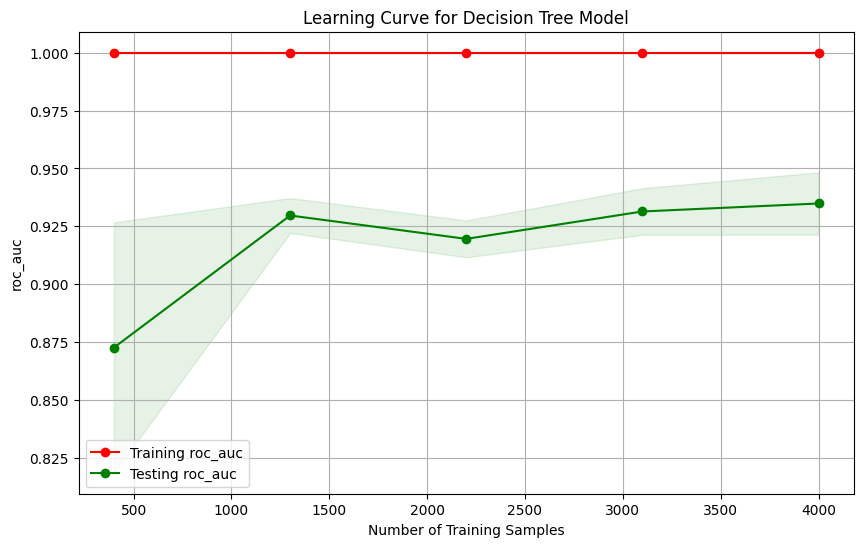

In [13]:
plot_learning_curve(dt_model, pd.concat([x_train, x_test]), pd.concat([y_train, y_test]), cv=5, scoring='roc_auc', title="Learning Curve for Decision Tree Model")

pada Model <b>Decision Tree</b> menunjukkan model mengalami <i>peningkatan performa</i>, namun masih terlalu jauh dari data training sehingga menunjukan adanya indikasi <i>overfit</i>. 

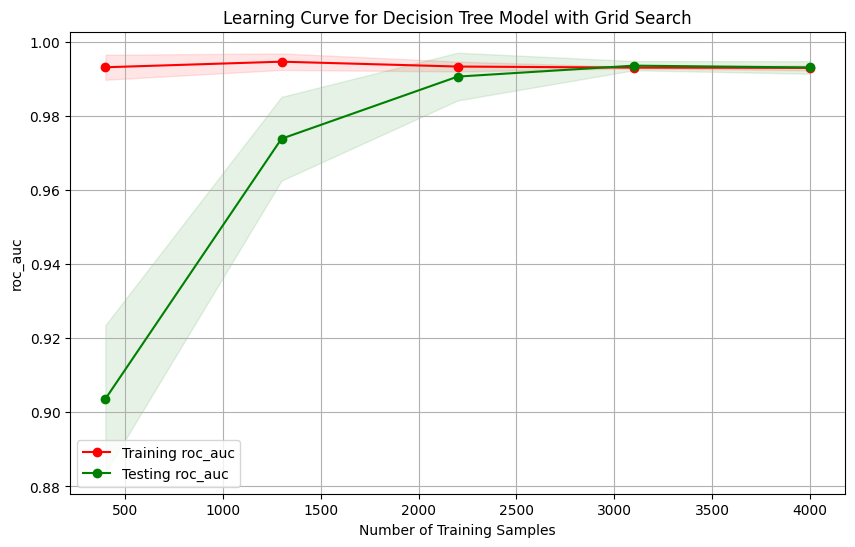

In [14]:
plot_learning_curve(dt_grid_best, pd.concat([x_train, x_test]), pd.concat([y_train, y_test]), cv=5, scoring='roc_auc', title="Learning Curve for Decision Tree Model with Grid Search")

pada Model <b>Decision Tree</b> yang dilakukan hyperparameter tuning dengan metode <b>Grid Search</b> menunjukkan model pengalami peningkatan <i>performa</i> yang <i>optimal</i>.

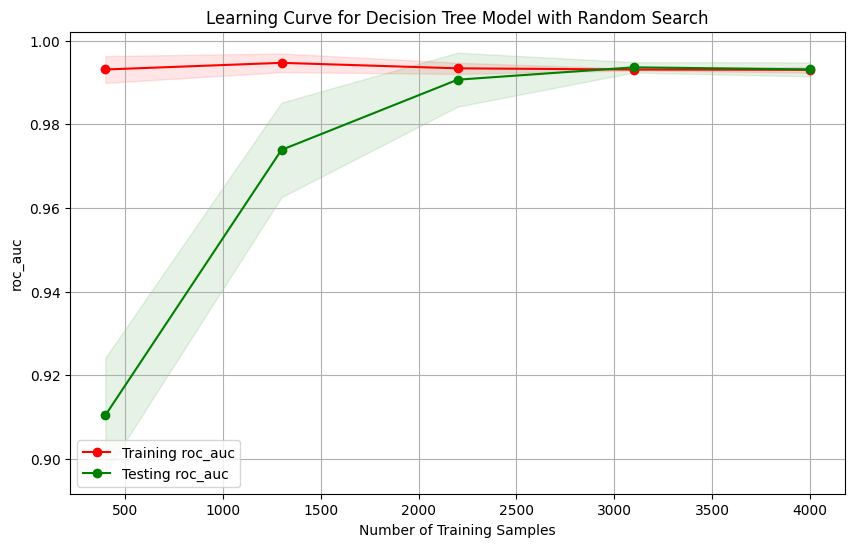

In [15]:
plot_learning_curve(dt_best_random, pd.concat([x_train, x_test]), pd.concat([y_train, y_test]), cv=5, scoring='roc_auc', title="Learning Curve for Decision Tree Model with Random Search")

pada Model <b>Decision Tree</b> yang dilakukan hyperparameter tuning dengan metode <b>Random Search</b> menunjukkan model pengalami peningkatan <i>performa</i> yang <i>optimal</i>.

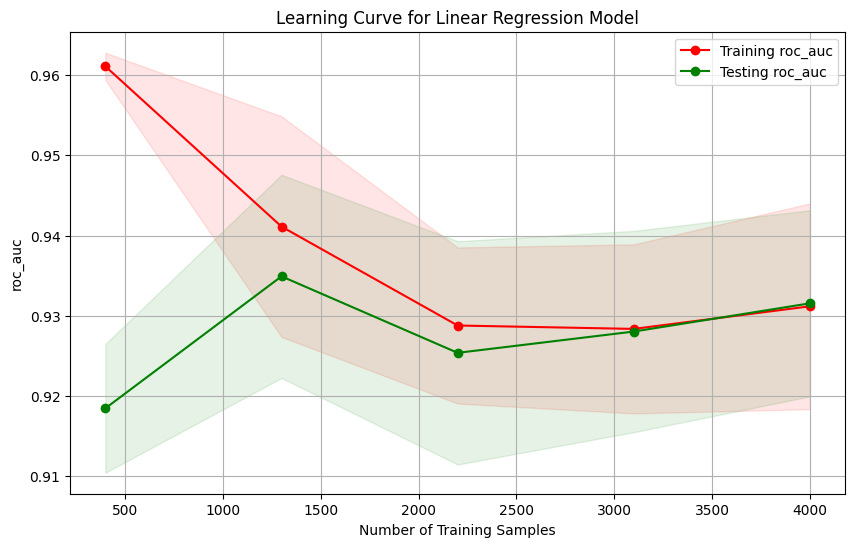

In [16]:
plot_learning_curve(logistic_model, pd.concat([x_train, x_test]), pd.concat([y_train, y_test]), cv=5, scoring='roc_auc', title="Learning Curve for Linear Regression Model")

pada Model <b>Linear Regression</b> menunjukkan model belum bisa memahami pola dengan baik sehingga performa yang dihasilkan masih <i>fluktuatif</i> dengan jumlah data yang ada.

### Conclusion

dari 4 (empat) model di atas. model yang paling baik digunakan untuk <i>case</i> ini adalah Model <b>Decision Tree dengan Grid Search/Random Search</b>